Part 4: Euler’s Method

In [1]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt

# Get data
vecs = np.reshape(np.fromfile("/content/drive/MyDrive/Colab Notebooks/wind_vectors.raw"), (20,20,2))
vecs_flat = np.reshape(vecs, (400,2)) # useful for plotting
vecs = vecs.transpose(1,0,2) # needed otherwise vectors don't match with plot

# X and Y coordinates of points where each vector is in space
xx, yy = np.meshgrid(np.arange(0, 20),np.arange(0, 20))


1. Use random sampling to generate 15 seed points within the range [0,19] in both
dimensions. Also, set the random seed manually to an arbitrary number. This will give
you consistent seed points, which will be helpful for comparison. Show an image of
your plot. 

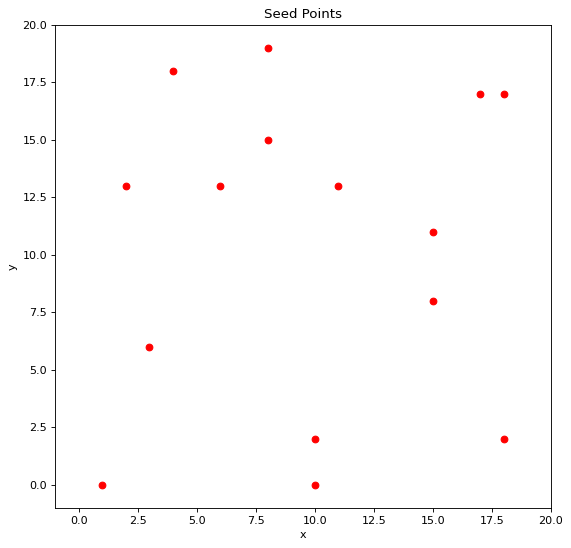

In [9]:
import random
from matplotlib.pyplot import figure

figure(figsize=(8, 8), dpi=80)

# Set the random seed manually to an arbitrary number
random.seed(6)

# Generate 15 random seed points in both dimensions
seed_points = []
for i in range(15):
    x = random.randint(0, 19)
    y = random.randint(0, 19)
    seed_points.append((x, y))

# Create a scatter plot of the seed points
x_coords = [p[0] for p in seed_points]
y_coords = [p[1] for p in seed_points]
plt.scatter(x_coords,y_coords,color='red')

# Set the x and y limits of the plot
plt.xlim(-1, 20)
plt.ylim(-1, 20)

# Set the title and labels
plt.title("Seed Points")
plt.xlabel("x")
plt.ylabel("y")

# Display the plot
plt.show()

2. Trace a streamline from each point. Use a time step value of 0.3 and perform 8 steps
for each streamline. You will need to write a function that will calculate the bilinear
interpolation(wikipedia.org/wiki/Bilinear_interpolation) of the 4 neighboring vectors.
Bound your points to the data range [0,20] along both dimensions. You can stop
tracing early if you reach the image boundary. Show an image of your plot.

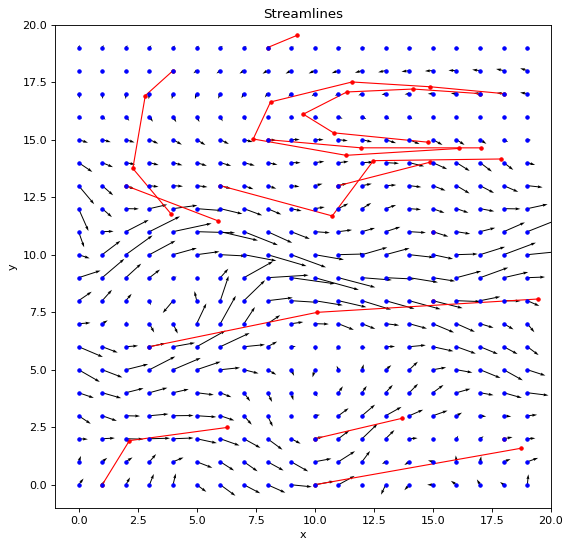

In [18]:
figure(figsize=(8, 8), dpi=80)

# Define the bilinear interpolation function
def bilinear_interpolation(x, y, field):
    x0 = int(x)-1
    y0 = int(y)-1
    x1 = x0 + 1
    y1 = y0 + 1
    v00 = field[x0, y0]
    v01 = field[x0, y1]
    v10 = field[x1, y0]
    v11 = field[x1, y1]
    return (v00 * (x1 - x) * (y1 - y) +
            v10 * (x - x0) * (y1 - y) +
            v01 * (x1 - x) * (y - y0) +
            v11 * (x - x0) * (y - y0)
           ) / ((x1 - x0) * (y1 - y0))

# Define the streamline function
def streamline(x0, y0, field, step_size, num_steps):
    x_coords = [x0]
    y_coords = [y0]
    for i in range(num_steps):
        x = x_coords[i]
        y = y_coords[i]
        vx = bilinear_interpolation(x, y, field[:,:,0])
        vy = bilinear_interpolation(x, y, field[:,:,1])
        x_next = x + vx * step_size
        y_next = y + vy * step_size
        if x_next < 0 or x_next > 20 or y_next < 0 or y_next > 20:
            break
        x_coords.append(x_next)
        y_coords.append(y_next)
    return x_coords, y_coords

# Generate the vector field
field = vecs

# Trace a streamline from each seed point
for x0, y0 in seed_points:
    x_coords, y_coords = streamline(x0, y0, field, 0.3, 8)
    plt.plot(x_coords, y_coords, '.-', color='red', lw=1)
plt.plot(xx, yy, marker='.', color='b', linestyle='none')
plt.quiver(xx, yy, vecs_flat[:,0], vecs_flat[:,1], width=0.002)

# Set the x and y limits of the plot
plt.xlim(-1, 20)
plt.ylim(-1, 20)

# Set the title and labels
plt.title("Streamlines")
plt.xlabel("x")
plt.ylabel("y")

# Display the plot
plt.show()


3. Trace streamlines again from the same seed points as the previous part. Make 3 more figures with the following parameters:

• Step size 0.15, steps 16

• Step size 0.075, steps 32

• Step size 0.0375, steps 64

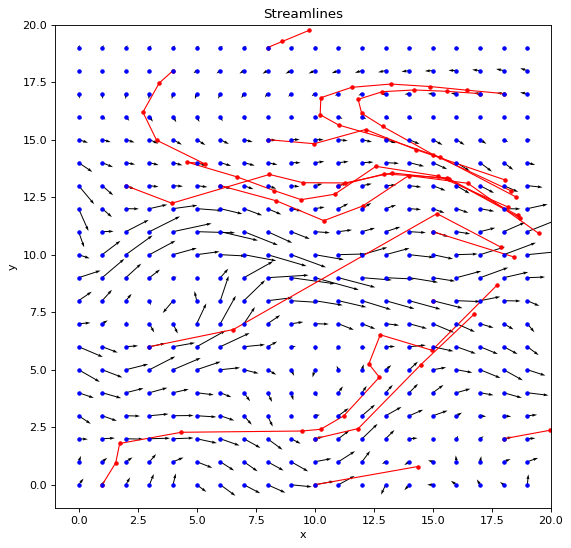

In [17]:
figure(figsize=(8, 8), dpi=80)

for x0, y0 in seed_points:
    x_coords, y_coords = streamline(x0, y0, field, 0.15, 16)
    plt.plot(x_coords, y_coords, '.-', color='red', lw=1)
plt.plot(xx, yy, marker='.', color='b', linestyle='none')
plt.quiver(xx, yy, vecs_flat[:,0], vecs_flat[:,1], width=0.002)

# Set the x and y limits of the plot
plt.xlim(-1, 20)
plt.ylim(-1, 20)

# Set the title and labels
plt.title("Streamlines")
plt.xlabel("x")
plt.ylabel("y")

# Display the plot
plt.show()

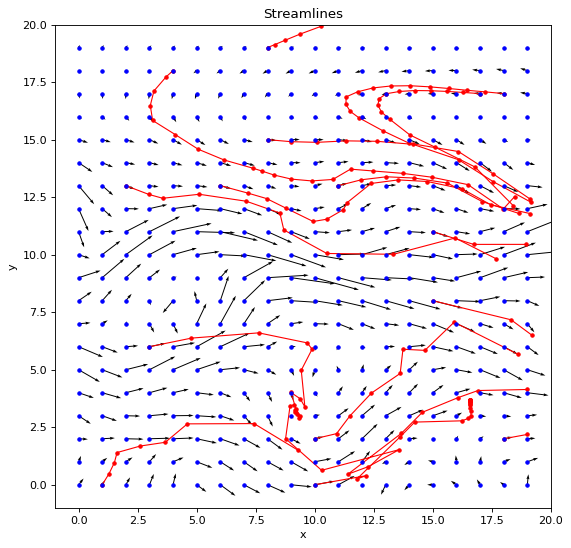

In [16]:
figure(figsize=(8, 8), dpi=80)

for x0, y0 in seed_points:
    x_coords, y_coords = streamline(x0, y0, field, 0.075, 32)
    plt.plot(x_coords, y_coords, '.-', color='red', lw=1)
plt.plot(xx, yy, marker='.', color='b', linestyle='none')
plt.quiver(xx, yy, vecs_flat[:,0], vecs_flat[:,1], width=0.002)

# Set the x and y limits of the plot
plt.xlim(-1, 20)
plt.ylim(-1, 20)

# Set the title and labels
plt.title("Streamlines")
plt.xlabel("x")
plt.ylabel("y")

# Display the plot
plt.show()

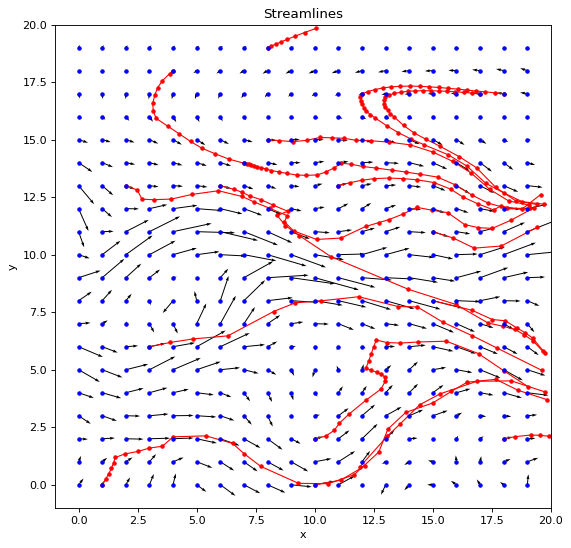

In [15]:
figure(figsize=(8, 8), dpi=80)

for x0, y0 in seed_points:
    x_coords, y_coords = streamline(x0, y0, field, 0.0375, 64)
    plt.plot(x_coords, y_coords, '.-', color='red', lw=1)
plt.plot(xx, yy, marker='.', color='b', linestyle='none')
plt.quiver(xx, yy, vecs_flat[:,0], vecs_flat[:,1], width=0.002)

# Set the x and y limits of the plot
plt.xlim(-1, 20)
plt.ylim(-1, 20)

# Set the title and labels
plt.title("Streamlines")
plt.xlabel("x")
plt.ylabel("y")

# Display the plot
plt.show()